In [1]:
import matplotlib.pyplot as plt
from aizynthfinder.aizynthfinder import AiZynthFinder
from aizynthfinder.chem import Molecule
from rdkit import Chem
from rdkit.Chem.Draw import MolToImage
from reaction_tree import ReactionTree
import queue

# 初始化配置

In [2]:
# 初始化 AiZynthFinder
filename = "config.yml"
finder = AiZynthFinder(filename)
# 选择库存、扩展策略和过滤策略
finder.stock.select("zinc")
finder.expansion_policy.select("uspto")
finder.filter_policy.select("uspto")
# 设置目标 SMILES
finder.target_smiles = "Cc1cccc(c1N(CC(=O)Nc2ccc(cc2)c3ncon3)C(=O)C4CCS(=O)(=O)CC4)C"

# 生成合成路径

In [3]:
# 执行树搜索
finder.tree_search()
finder.build_routes()

# 显示结果(其中第一条路径)

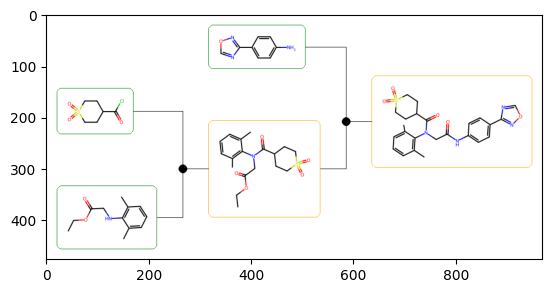

In [4]:
tree = finder.routes.reaction_trees[0]
plt.imshow(tree.to_image())
plt.show()

In [5]:
def get_img_from_smiles(smile):
    mol = Chem.MolFromSmiles(Molecule(smiles=smile).smiles)
    return MolToImage(mol)

In [6]:
tree = ReactionTree.from_dict(tree.to_dict())
tree.print_tree()

_type: mol
hide: False
smiles: Cc1cccc(C)c1N(CC(=O)Nc1ccc(-c2ncon2)cc1)C(=O)C1CCS(=O)(=O)CC1
is_chemical: True
in_stock: False
    _type: reaction
    hide: False
    smiles: [C:1]([CH3:2])(=[O:3])[N:4][cH3:5]>>CCO[C:1]([CH3:2])=[O:3].[N:4][cH3:5]
        _type: mol
        hide: False
        smiles: Nc1ccc(-c2ncon2)cc1
        is_chemical: True
        in_stock: True
        _type: mol
        hide: False
        smiles: CCOC(=O)CN(C(=O)C1CCS(=O)(=O)CC1)c1c(C)cccc1C
        is_chemical: True
        in_stock: False
            _type: reaction
            hide: False
            smiles: [C:1]([CH3:2])(=[O:3])[N:5]([CH3:4])[cH3:6]>>Cl[C:1]([CH3:2])=[O:3].[CH3:4][N:5][cH3:6]
                _type: mol
                hide: False
                smiles: O=C(Cl)C1CCS(=O)(=O)CC1
                is_chemical: True
                in_stock: True
                _type: mol
                hide: False
                smiles: CCOC(=O)CNc1c(C)cccc1C
                is_chemical: True
             